## Simple Linear Regression  

In this notebook, we'll build a linear regression model to predict Kilometer per liter  using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data


In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


In [4]:
# Read the given CSV file, and view some sample records

data = pd.read_csv("/content/data.csv")
data.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


# Let's inspect the various aspects of our dataframe

In [6]:
data.shape

(398, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


 ## Cleaning the data 

In [8]:
data['horsepower'].unique() 


array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
#Remove the "?" marks  
data = data [data['horsepower'] != "?"]

In [10]:
data = data.reset_index(drop = True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    object 
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 27.7+ KB


In [12]:
data["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [13]:
# convert object[] to INT[] 
data["horsepower"] = data["horsepower"].astype(int)

In [ ]:
#check data Information  
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               392 non-null    int64  
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    int64  
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   name                 392 non-null    object 
 8   Kilometer_per_liter  392 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [15]:
data.describe()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.576531,5.471939,194.411990,104.469388,2977.584184,15.541327,1975.979592,9.967885
std,0.805518,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.318250
min,1.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,1973.000000,7.227443
50%,1.000000,4.000000,151.000000,93.500000,2803.500000,15.500000,1976.000000,9.672019
75%,2.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


## Step 2: finding the Relevant attributes by correlation

 relevant attributes by correlation factorvisualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to kilimeter per hourse. 

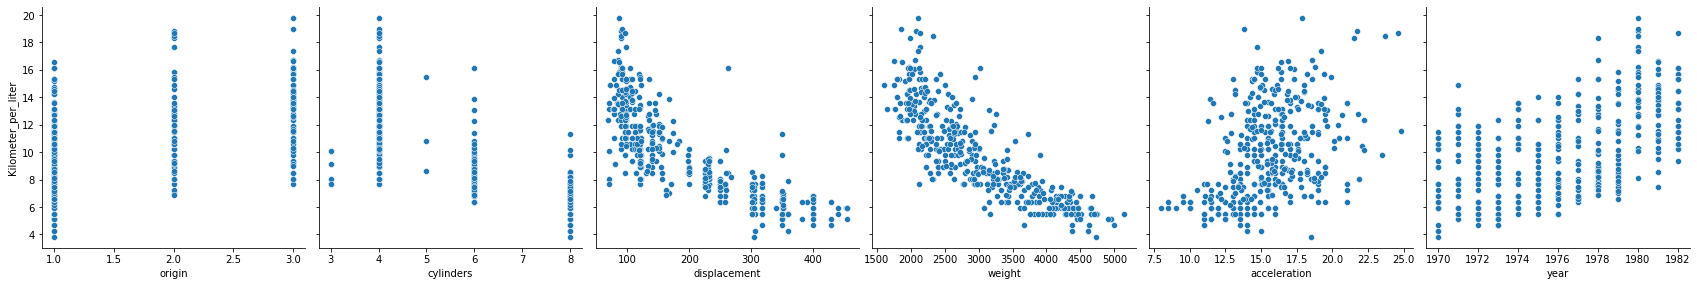

In [14]:
sns.pairplot(data, x_vars=
['origin',	'cylinders',	'displacement',	'weight',	'acceleration',	'year'],y_vars='Kilometer_per_liter',size=4, aspect=1, kind='scatter')
plt.show()

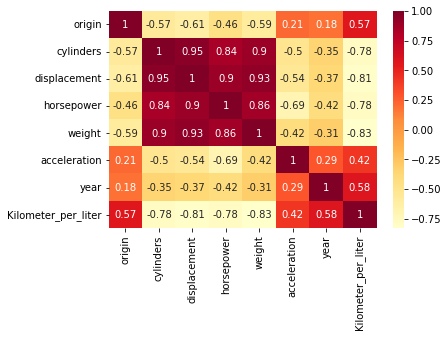

In [16]:
sns.heatmap(data.corr(), cmap="YlOrRd", annot = True)
plt.show()


The measure of the relationship between two variables is shown by the correlation coefficient. The range of the coefficient lies between -1 to +1. This coefficient shows the strength of the association of the observed data between two variables.

## model building using statsmodels

In [19]:
X = data["weight"]
y = data["Kilometer_per_liter"]

## Train-Test Split
 Import`train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [20]:
# train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [21]:
# Let's now take a look at the train dataset

X_train.head()

169    2702
265    2560
386    2950
241    2720
249    3570
Name: weight, dtype: int64

In [22]:
y_train.head()


169    10.203449
265    11.691452
386    11.478880
241     9.140590
249     8.587903
Name: Kilometer_per_liter, dtype: float64

In [23]:
X_train.shape

(274,)

In [24]:
y_train.shape

(274,)

## calling the model 

In [27]:
lr = LinearRegression()
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the model using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()


In [29]:
X_train_sm.head()

,const,weight
169,1.0,2702
265,1.0,2560
386,1.0,2950
241,1.0,2720
249,1.0,3570


In [30]:
# Print the parameters
lr.params

const     19.764945
weight    -0.003265
dtype: float64

In [31]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                             OLS Regression Results                            
Dep. Variable:     Kilometer_per_liter   R-squared:                       0.693
Model:                             OLS   Adj. R-squared:                  0.692
Method:                  Least Squares   F-statistic:                     614.8
Date:                 Mon, 29 Aug 2022   Prob (F-statistic):           9.16e-72
Time:                         15:59:38   Log-Likelihood:                -562.82
No. Observations:                  274   AIC:                             1130.
Df Residuals:                      272   BIC:                             1137.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.7649      0.409     48.33

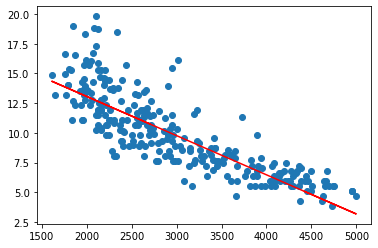

In [32]:
plt.scatter(X_train,y_train)
plt.plot(X_train,19.665903+(-0.0033)*X_train, 'r')
plt.show()

## Predictions on the Test Set<br>

In [33]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

In [41]:
x_test_sm = sm.add_constant(X_test)


y_pred = lr.predict(x_test_sm)

R-squared (R2) is an important statistical measure which is a regression model that represents the proportion of the difference or variance in statistical terms for a dependent variable which can be explained by an independent variable or variables. In short, it determines how well data will fit the regression model.

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [47]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.6878428923548858

Visualizing the fit on the test set


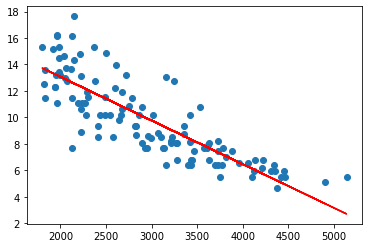

In [45]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 19.665903+(-0.0033)*X_test, 'r')
plt.show()